In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#loading of data
data = pd.read_csv('loan_application_data.csv')
data.head(5)

,Credit_Score,Income,DTI_Ratio,Loan_Amount,Approved
0,402,49806,0.11,40450,0
1,735,108199,0.76,38757,0
2,570,61321,0.41,17476,0
3,406,85095,0.66,46214,0
4,371,42656,0.26,9711,0


In [3]:
#comprehensive exploratory data anakysis (EDA)
print('Descriptive statistics:')
data.describe()

Descriptive statistics:


,Credit_Score,Income,DTI_Ratio,Loan_Amount,Approved
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,570.53150,69084.743500,0.491955,27832.604000,0.074500
std,159.22208,29221.446766,0.286273,13033.714893,0.262649
min,300.00000,20112.000000,0.000000,5021.000000,0.000000
25%,430.75000,42743.500000,0.240000,16554.000000,0.000000
50%,570.50000,69000.000000,0.490000,27909.000000,0.000000
75%,705.00000,95371.500000,0.740000,39489.750000,0.000000
max,849.00000,119977.000000,1.000000,49997.000000,1.000000


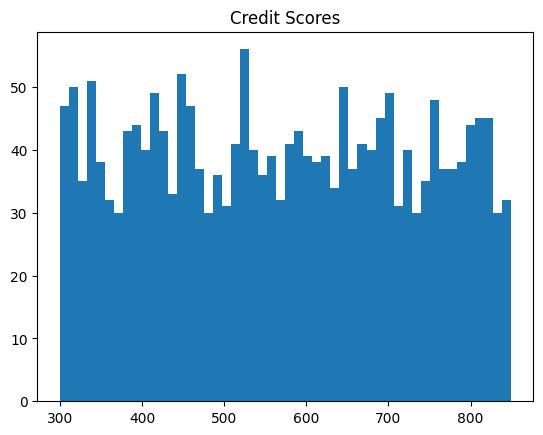

In [13]:
plt.hist(data['Credit_Score'], bins=50)
plt.title('Credit Scores')
plt.show()

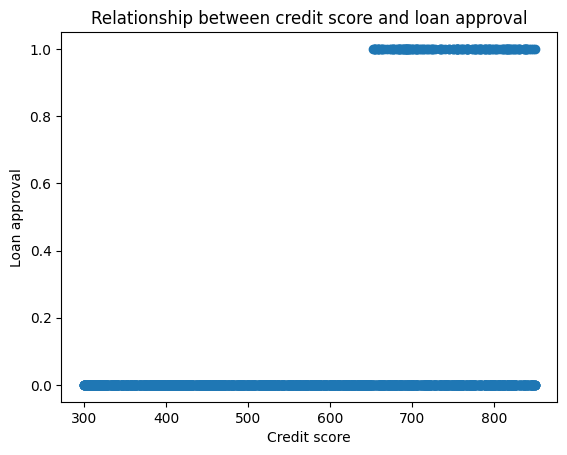

In [14]:
plt.scatter(data['Credit_Score'], data['Approved'])
plt.title('Relationship between credit score and loan approval')
plt.xlabel('Credit score')
plt.ylabel('Loan approval')
plt.show()

In [19]:
#assigning the variables
X = data.drop('Approved', axis = 1).values
y = data['Approved'].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 45)

In [21]:
#feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#training the model
svm = SVC(kernel = 'linear', C=1.0, random_state=45)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=45)

In [26]:
# 8. Predict
y_pred = svm.predict(X_test_scaled)

In [27]:
# 9. Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[362   5]
 [ 20  13]]


In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       367
           1       0.72      0.39      0.51        33

    accuracy                           0.94       400
   macro avg       0.83      0.69      0.74       400
weighted avg       0.93      0.94      0.93       400



In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [30]:
# Distributions instead of fixed grid
param_dist = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.001, 1),
    'kernel': ['linear']
}

In [31]:
# Randomized Search
rand_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=20, cv=5, random_state=45)
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017DFAB91310>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000017DFBE542E0>,
                                        'kernel': ['linear']},
                   random_state=45)

In [32]:
# Results
print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)


Best Parameters: {'C': 99.00115134756001, 'gamma': 0.5505447268447254, 'kernel': 'linear'}
Best Score: 0.9512499999999999


In [34]:
#training the model
svm = SVC(kernel = 'linear', C=99.00115134756001, gamma = .05505447268447254, random_state=45)
svm.fit(X_train_scaled, y_train)

SVC(C=99.00115134756001, gamma=0.05505447268447254, kernel='linear',
    random_state=45)

In [37]:
# 8. Predict
y_pred = svm.predict(X_test_scaled)

In [38]:
# 9. Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[362   5]
 [ 21  12]]


In [39]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       367
           1       0.71      0.36      0.48        33

    accuracy                           0.94       400
   macro avg       0.83      0.68      0.72       400
weighted avg       0.93      0.94      0.93       400

